In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
from sklearn.datasets import load_iris
iris = load_iris().data

In [16]:
dir(load_iris())

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
df = pd.DataFrame(iris,columns=load_iris().feature_names)
df =df.drop(['sepal length (cm)','sepal width (cm)'],axis="columns")
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


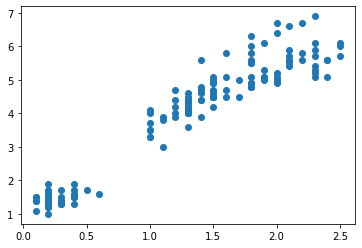

In [18]:
plt.scatter(df['petal width (cm)'],df['petal length (cm)'])


In [19]:
mod = KMeans(n_clusters=3)
predicted = mod.fit_predict(df)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
df['predicted'] = predicted
df

,petal length (cm),petal width (cm),predicted
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [21]:
df0= df[df['predicted']==0]
df1 = df[df['predicted'] == 1]
df2 = df[df['predicted'] ==2 ]

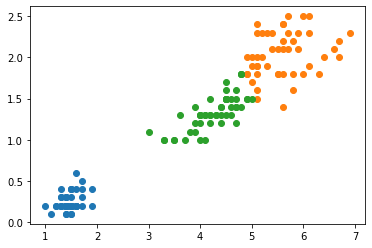

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
dic = {'0':df0,'1':df1,'2':df2}
i = 0

for  key,value in dic.items():
    
    
    plt.scatter(value['petal length (cm)'],value['petal width (cm)'])
    i+= 1 

In [26]:
scaler = MinMaxScaler()
cols = df.columns.to_list()
for scale in range(2):
    df[cols[scale]] = scaler.fit_transform(df[[cols[scale]]])
df    

,petal length (cm),petal width (cm),predicted
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [28]:
df0= df[df['predicted']==0]
df1 = df[df['predicted'] == 1]
df2 = df[df['predicted'] ==2 ]
df0.head(1)

,petal length (cm),petal width (cm),predicted
0,0.067797,0.041667,0


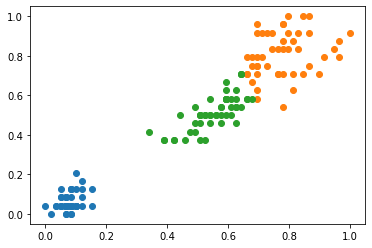

In [29]:
dic = {'0':df0,'1':df1,'2':df2}
i = 0

for  key,value in dic.items():
    
    
    plt.scatter(value['petal length (cm)'],value['petal width (cm)'])
    i+= 1 

# so, in this case there is no diff btw data using scalar or not

In [36]:
elb = []
rage = range(1,10)
for one in rage:
    km = KMeans(n_clusters=one)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    elb.append(km.inertia_)
    


C:\Users\fuu1u\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


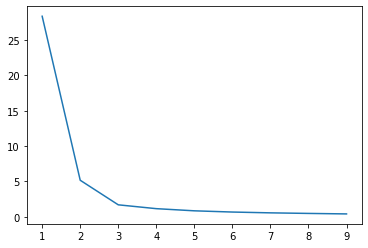

In [37]:
plt.plot(rage,elb)